In [1]:
import pandas as pd
import glob

from src.visual_utils import plot_data_bar, plot_data_line
from src.stats_utils import calculate_retention

In [7]:
files = glob.glob("dataset/*.csv.gz")


dfs = [pd.read_csv(f, compression="gzip") for f in files]
df = pd.concat(dfs)

In [2]:
df = pd.read_csv("dataset/000000000000.csv.gz")
df["install_date"] = pd.to_datetime(df["install_date"])
df["event_date"] = pd.to_datetime(df["event_date"])

An interesting (maybe not so shocking) insight from the dataset is below:

X axis is days and y axis is daily active users.<br>
We can see from the bar chart that the players are significantly more active during 2 days of the week. And those days are Saturday and Sunday.

c:\Users\PC\Desktop\Programming_Projects\vertigo-games-data-analysis\src\visual_utils.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


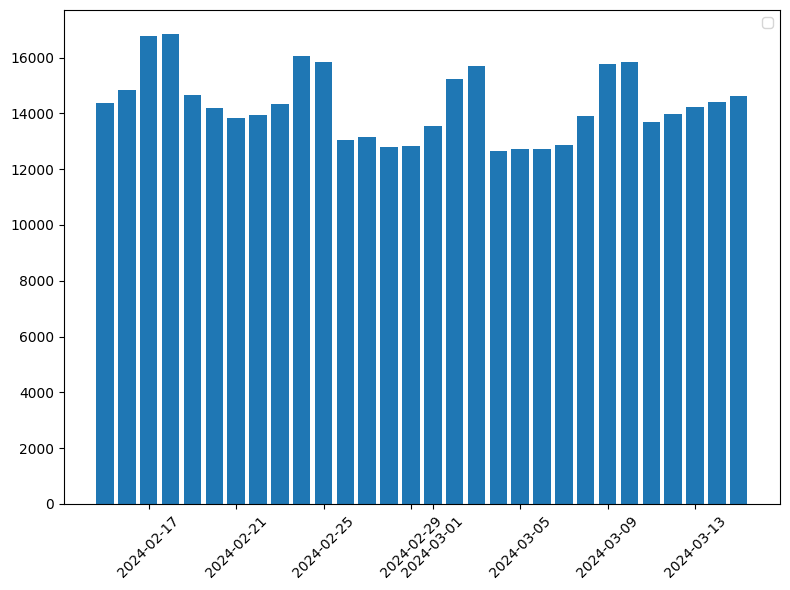

In [3]:
temp = df.groupby("event_date")["user_id"].nunique()
x = temp.index
y = temp.values

plot_data_bar(x, y, 45)


c:\Users\PC\Desktop\Programming_Projects\vertigo-games-data-analysis\src\visual_utils.py:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


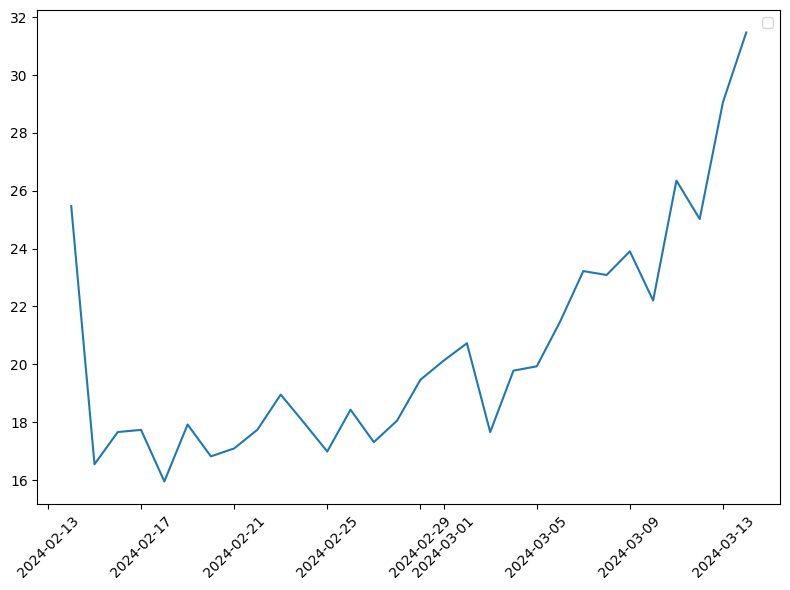

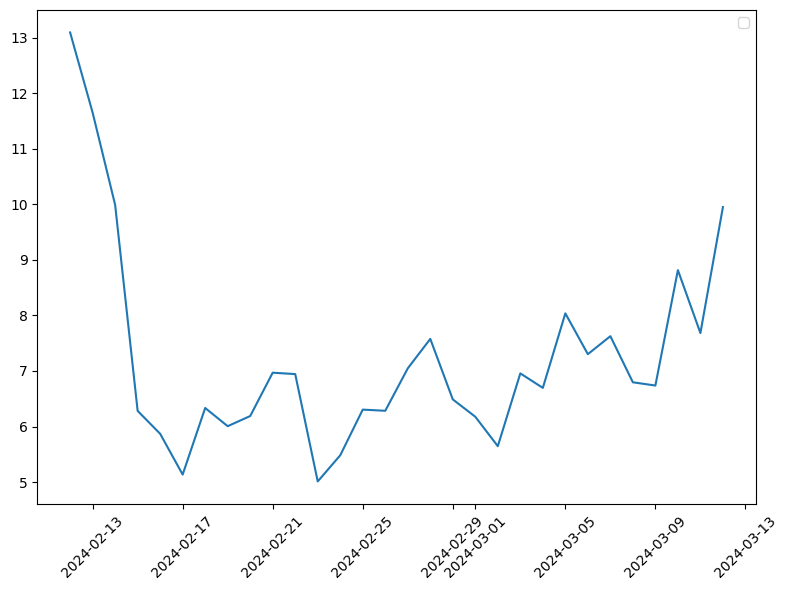

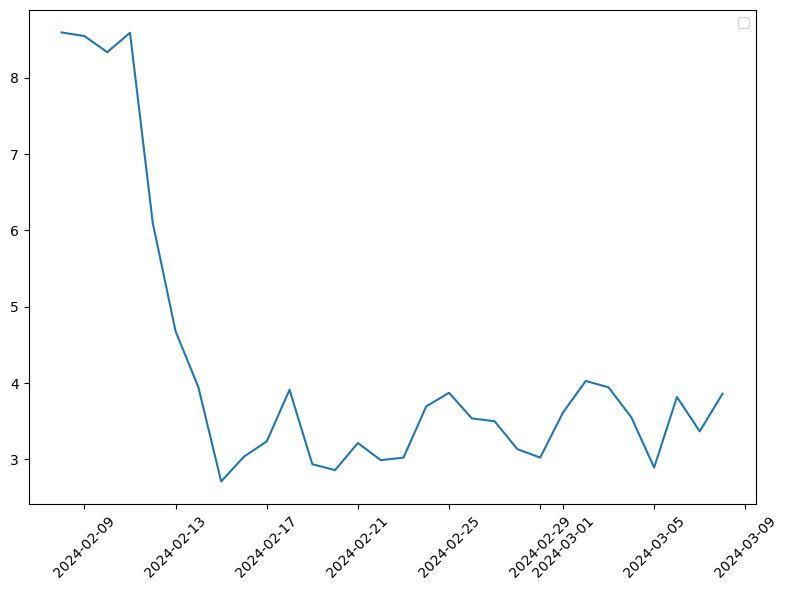

In [6]:
d1_retention = calculate_retention(df, 1)
d3_retention = calculate_retention(df, 3)
d7_retention = calculate_retention(df, 7)

plot_data_line(d1_retention.index, d1_retention.values, 45)
plot_data_line(d3_retention.index, d3_retention.values, 45)
plot_data_line(d7_retention.index, d7_retention.values, 45)